Meet Patel - Section 11

## MISY408- Project 5 (KMeans Clustering)

**Question 1: Read the Mall_Customers csv file into df dataframe and display first 5 rows of it**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Question 2: Exploratory data analysis. For this part you should:**

        1) check the shape of dataset
        2) view the statistical summary of numerical variables (use describe)
        3) check for null values 
        4) drop duplicates
        

In [2]:
df.shape

(200, 5)

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

**Question 3: Import required Libraries for K-Means clustering**

In [6]:
import sklearn
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale, StandardScaler

**Question 4: Subset the df dataframe to 'Annual Income' and 'Spending Score' and get a deep copy of df dataframe and save it in df2**

In [7]:
df2 = df[['Annual Income','Spending Score']].copy()

**Question 5: Scale the data and then print the mean and std of scaled data to make sure the data is scaled**

example of printing: income mean is ...

In [8]:
scaler = StandardScaler()
scaler.fit(df2) 
scaled_array = scaler.transform(df2)

In [22]:
Annual_income_average = np.mean(scaled_array[:,0]) 
Annual_income_std = np.std(scaled_array[:,0])
Spending_Score_average=np.mean(scaled_array[:,1])
Spending_Score_std=np.std(scaled_array[:,1])

print('Annual income mean is {:.6f}.'.format(Annual_income_average))
print('Annual income std is {:.6f}.'.format(Annual_income_std))
print('Spending mean is {:.6f}.'.format(Spending_Score_average))
print('Spending std is {:.6f}.'.format(Spending_Score_std))

Annual income mean is -0.000000.
Annual income std is 1.000000.
Spending mean is -0.000000.
Spending std is 1.000000.



**Question 6: How many clusters do we need for K-means clustering? (you should use elbow methond to guide you to determine the number of clusters you need for KMeans clustering. Then, based on the output, please explain why you choose certain number of clusters).**

C:\Users\Meet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


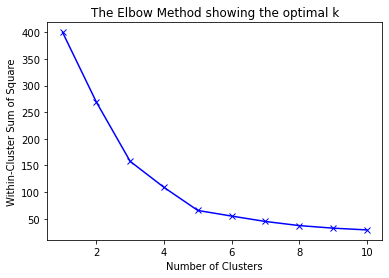

In [25]:
wcss=[] 

from matplotlib import pyplot as plt

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 0) 
    kmeans.fit(scaled_array)
    wcss.append(kmeans.inertia_) 
    
    
plt.plot(range(1, 11), wcss , 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('The Elbow Method showing the optimal k')
plt.show()


**Explain the reason for choosing certain number of clusters here:**

From the elbow method graph above, we can assume that a value of 5 clusters would be ideal as this is where the relative value of adding more clusters starts to diminish. 

**Question 7: Do K-means clustering, identify the coordinates of the unscaled centroids, and store the unscaled centroids in a new dataframe called centroids** (Display cetroids dataframe in the output)

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmeans = kmeans.fit(scaled_array) 

In [27]:
unscaled_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled_centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [28]:
centroids = pd.DataFrame({'centroid_Annual_income':unscaled_centroids[:,0],'centroid_Spending_Score':unscaled_centroids[:,1]})

In [29]:
centroids 

,centroid_Annual_income,centroid_Spending_Score
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


**Question 8: Store the cluster numbers under label column in the df2 dataframe** (display first 5 rows of df2 dataframe to make sure label column is added)

In [34]:
df2['label'] = kmeans.labels_.astype(int) 
df2.head(5)

,Annual Income,Spending Score,label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


**Question 9: Plot the KMeans clustering results with scatterplot** (centroids should have red color)

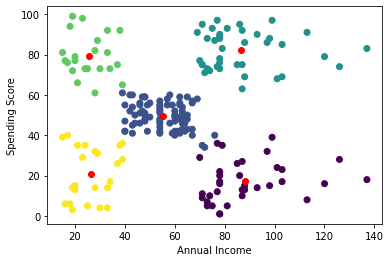

In [33]:
plt.scatter(df2['Annual Income'], df2['Spending Score'], c=df2['label'])
plt.scatter(centroids['centroid_Annual_income'], centroids['centroid_Spending_Score'], c='red') 
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()

**Question 10: Interpret the results in detail. What does each cluster tell us?**

In the scatter plot above we have found five clusters AND five centroids represnted by the red dot. 

The five clusters represent: groups of Individuals with different economic status and their spending behaviors at the mall.  
* The yellow cluster(Poor): Low income, Low annual spending 
* The Purple Cluster(Frugle): High Income, Low annual spending
* The Blue Cluster(middle-class): Middle income, Moderate annual spending 
* The Blueish-green Cluster(High-class): High Income, High annual spending 
* The Green Cluster (non-Frugle): Low income, High annual Spending 
